# Classification of Positive and Negative comments on Amazon for their instruments 

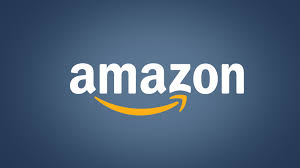

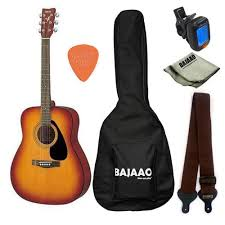

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

![](https://ae01.alicdn.com/kf/H691245b687f742f1a33149f0b57ba495j/headless-electric-acoustic-silent-left-right-hand-guitar-travel-mini-portable-built-in-effect-free-shipping.jpg)

In [ ]:
data = pd.read_csv('/kaggle/input/amazon-music-reviews/Musical_instruments_reviews.csv')
data

In [ ]:
data.isna().sum()

In [ ]:
data.reviewText.fillna("",inplace = True)

![](https://cdn4.vectorstock.com/i/1000x1000/25/23/acoustic-and-electric-guitars-vector-892523.jpg)

In [ ]:
data.drop(['reviewerID', 'asin', 'reviewerName', 'helpful', 'unixReviewTime', 'reviewTime'], axis = 1, inplace = True)
data

In [ ]:
data['reviewText'][5]

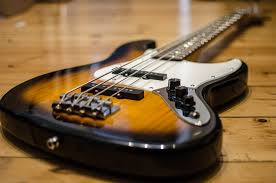

In [ ]:
data['review'] = data['reviewText'] + ' ' + data['summary']
data.drop(['reviewText', 'summary'], axis = 1, inplace = True)
data

![](https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcQPOtfN9djOutZeByWScVDwPS4tdGpiLehsAPiHVPD6_g&usqp=CAU&ec=45682160)

In [ ]:
for i in range(0, data['overall'].size):
    if data['overall'][i] > 3.0:
        data['overall'][i] = 1
    else:
        data['overall'][i] = 0

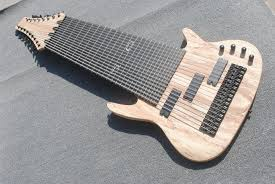

In [ ]:
data['overall'].value_counts()

![](https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcQuU_oc0rR-1YAQgy25bgx8Q7DD_Zw4TGWj_Q&usqp=CAU)

In [ ]:
#Cleaning the text
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
corpus = []
for i in range(0, data.shape[0]):
    review = re.sub('[^a-zA-Z]',' ', str(data['review'][i]))
    review = review.lower()
    review = review.split()
    ps = PorterStemmer()
    review = [ps.stem(word) for word in review if not word in set(stopwords.words('english'))]
    review = ' '.join(review)
    corpus.append(review)

![](https://images-na.ssl-images-amazon.com/images/I/71WdnQJYyNL._AC_SX425_.jpg)

In [ ]:
#Creating the bag of words model
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features = 1500)

In [ ]:
#Independent Vector
X = cv.fit_transform(corpus).toarray()
#Dependent Vector
y = data['overall']

In [ ]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

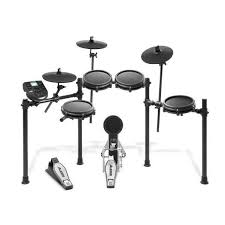

## I will try to use Gaussian Naive Bayes for this problem.

In [ ]:
# Training the  model on the Training set
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

In [ ]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)

In [ ]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

In [ ]:

# Evaluate the performance of the classifier
from sklearn.metrics import accuracy_score, mean_squared_error, classification_report
accuracy = round(accuracy_score(y_test, y_pred) * 100, 2)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
report = classification_report(y_test, y_pred)

print('The accuracy of the classifier is {0}%'.format(accuracy))
print('\nThe calculated RMSE is {0}'.format(rmse))
print('\nThe classification report is as follows:\n')
print(report)

 ## Since I did not get a feasible model using Gaussian Naive Bayes, let's try using an Artificial Neural Network

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
classifier = Sequential()
classifier.add(Dense(units = 75 , activation = 'relu' , input_dim = X_train.shape[1]))
classifier.add(Dense(units = 50 , activation = 'relu'))
classifier.add(Dense(units = 25 , activation = 'relu'))
classifier.add(Dense(units = 10 , activation = 'relu')) 
classifier.add(Dense(units = 1 , activation = 'sigmoid'))
classifier.compile(optimizer = 'adam' , loss = 'binary_crossentropy' , metrics = ['accuracy'])

![](https://wand-research.com/wp-content/uploads/2018/02/understanding-cnn.gif)

In [ ]:
classifier.fit(X_train,y_train , epochs = 10)

In [ ]:
# Evaluate the model on the test data using `evaluate`
print("Evaluate on test data")
results = classifier.evaluate(X_test,y_test)
print("test loss, test acc:", results)

## I received an 89% accuracy using Neural networks which I am moderately satisfied with.

# Please upvote this notebook if you liked it!

## Please have a look at my other notebooks and upvote if you like them.
# https://www.kaggle.com/souhardyaganguly/notebooks